# Question 1 
## Creating 4 datastets

Each of the given datasets are GMMs. The sample size differs. My datastet is created by first creating uniform distribution across all given priors (this were labels) and then picked up points from those labels to select which guassian to pick the data point from. I create a function :
1) create_dataset_2_2: this takes all necesssary guassian parametetrs in and gives out a dataset and its labels.

For finding min P error classifier, I implemented the following mathematical procedure:
1) Given: 
    Data Sample X which has prob P : D_num_train,
    Conditional Probability x|L: cond_pdf_class0_log,cond_pdf_class1_log,
    Class Priors: prior,
    Loss: 0/1 (as min P error)
    
2) Discriminant finction for making decision is based on log likelihood test.
    

In [1]:
#from Create_dataset import create_dataset_2_2
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
#from fun_lib_c import create_dataset_2_2,min_P_error_classifier,model
from fun_lib import create_dataset_2_2,min_P_error_classifier
from fun_lib2 import model

#setting the size of the plot
plt.rcParams['figure.figsize'] = [5, 5]

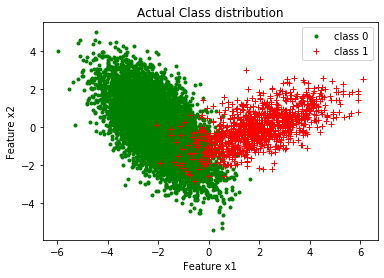

In [8]:
D_10_tr,labels_D_10_tr,m1,c1 = create_dataset_2_2(0,0.9,0.1,10,-2,0,1,-0.9,-0.9,2,2,0,2,0.9,0.9,1,499) #consists 10 samples and their labels for training
D_100_tr,labels_D_100_tr,m2,c2 = create_dataset_2_2(0,0.9,0.1,100,-2,0,1,-0.9,-0.9,2,2,0,2,0.9,0.9,1,499) #consists 100 samples and their labels for training
D_100_tr,labels_D_1000_tr,m3,c3 = create_dataset_2_2(0,0.9,0.1,1000,-2,0,1,-0.9,-0.9,2,2,0,2,0.9,0.9,1,499) #consists 1000 samples and their labels for training
D_10k_V,labels_D_10k_V,m4,c4 = create_dataset_2_2(1,0.9,0.1,10000,-2,0,1,-0.9,-0.9,2,2,0,2,0.9,0.9,1,499) #consists 10K samples and their labels for validation

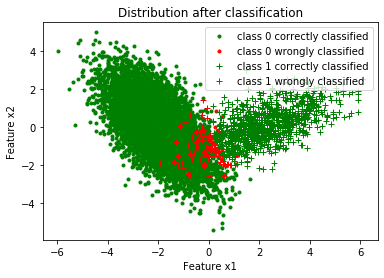

C:\Users\Kathan\Desktop\AML\Assignment2\fun_lib.py:140: RuntimeWarning: divide by zero encountered in log
  new_labels1[0,:] = (discriminant_score >= np.log(gamma1)).astype(int)


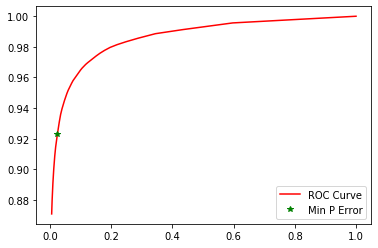

In [3]:
#### Q1 Part 1
min_P_error_classifier(10000,0.9,0.1,D_10k_V,labels_D_10k_V,m4,c4)

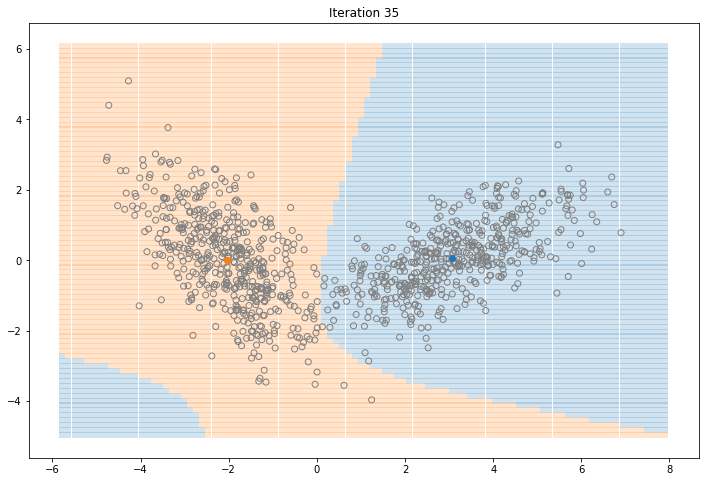

In [10]:
######### Q1 Part 2 
######## D_10_train
p = np.array([[0.9,0.1]]);
m = 10
np.random.seed(404)
y = np.where(np.reshape(np.random.random((1,m)), (m,1))>=p[0][0],1,0)
num0 = np.argwhere(y==0).shape[0];
num1 = np.argwhere(y==1).shape[0];
m0 = np.array([-2,0]);
c0 = np.array([[1,0],[0,3]]); 
n0=num0;
x0 = np.random.multivariate_normal(m0,c0,n0);
m1 = np.array([2,0]);
c1 = np.array([[1,0],[0,3]]);n1=num1;
x1 = np.random.multivariate_normal(m1,c1,n1);
test_set_x = train_set_x = np.concatenate((x0, x1), axis=0).T;
test_set_y = train_set_y = np.concatenate((np.zeros((5, 1)),np.ones((5,1))), axis=0).T;
print("dataset:", test_set_x.shape);
print("Labels_set:",test_set_y.shape);
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

dataset: (2, 10)
Labels_set: (1, 10)
Cost after iteration 0: 3.465736
Cost after iteration 100: 2.175637
Cost after iteration 200: 1.994388
Cost after iteration 300: 1.943126
Cost after iteration 400: 1.923591
Cost after iteration 500: 1.914710
Cost after iteration 600: 1.910111
Cost after iteration 700: 1.907468
Cost after iteration 800: 1.905816
Cost after iteration 900: 1.904716
Cost after iteration 1000: 1.903948
Cost after iteration 1100: 1.903397
Cost after iteration 1200: 1.902992
Cost after iteration 1300: 1.902690
Cost after iteration 1400: 1.902464
Cost after iteration 1500: 1.902294
Cost after iteration 1600: 1.902165
Cost after iteration 1700: 1.902068
Cost after iteration 1800: 1.901994
Cost after iteration 1900: 1.901937
train accuracy: 80.0 %
test accuracy: 80.0 %


In [11]:
######### Q1 Part 2:
#### D_100_train
p = np.array([[0.9,0.1]]);
m = 100
np.random.seed(404)
y = np.where(np.reshape(np.random.random((1,m)), (m,1))>=p[0][0],1,0)
num0 = np.argwhere(y==0).shape[0];
num1 = np.argwhere(y==1).shape[0];
m0 = np.array([-2,0]);
c0 = np.array([[1,0],[0,3]]); 
n0=num0;
x0 = np.random.multivariate_normal(m0,c0,n0);
m1 = np.array([2,0]);
c1 = np.array([[1,0],[0,3]]);n1=num1;
x1 = np.random.multivariate_normal(m1,c1,n1);
test_set_x = train_set_x = np.concatenate((x0, x1), axis=0).T;
test_set_y = train_set_y = np.concatenate((np.zeros((50, 1)),np.ones((50,1))), axis=0).T;
print("dataset:", test_set_x.shape);
print("Labels_set:",test_set_y.shape);
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.0005, print_cost = True)

dataset: (2, 100)
Labels_set: (1, 100)
Cost after iteration 0: 34.657359
Cost after iteration 100: 31.781483
Cost after iteration 200: 31.093737
Cost after iteration 300: 30.671562
Cost after iteration 400: 30.400089
Cost after iteration 500: 30.220495
Cost after iteration 600: 30.098930
Cost after iteration 700: 30.015101
Cost after iteration 800: 29.956415
Cost after iteration 900: 29.914821
Cost after iteration 1000: 29.885041
Cost after iteration 1100: 29.863539
Cost after iteration 1200: 29.847906
Cost after iteration 1300: 29.836473
Cost after iteration 1400: 29.828070
Cost after iteration 1500: 29.821869
Cost after iteration 1600: 29.817276
Cost after iteration 1700: 29.813864
Cost after iteration 1800: 29.811323
Cost after iteration 1900: 29.809426
train accuracy: 59.0 %
test accuracy: 59.0 %


In [12]:
######### Q1 Part 2
###### D_1000_train
p = np.array([[0.9,0.1]]);
m = 1000
np.random.seed(404)
y = np.where(np.reshape(np.random.random((1,m)), (m,1))>=p[0][0],1,0)
num0 = np.argwhere(y==0).shape[0];
num1 = np.argwhere(y==1).shape[0];
m0 = np.array([-2,0]);
c0 = np.array([[1,0],[0,3]]); 
n0=num0;
x0 = np.random.multivariate_normal(m0,c0,n0);
m1 = np.array([2,0]);
c1 = np.array([[1,0],[0,3]]);n1=num1;
x1 = np.random.multivariate_normal(m1,c1,n1);
test_set_x = train_set_x = np.concatenate((x0, x1), axis=0).T;
test_set_y = train_set_y = np.concatenate((np.zeros((500, 1)),np.ones((500,1))), axis=0).T;
print("dataset:", test_set_x.shape);
print("Labels_set:",test_set_y.shape);
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.00000000005, print_cost = True)

dataset: (2, 1000)
Labels_set: (1, 1000)
Cost after iteration 0: 346.573590
Cost after iteration 100: 346.573544
Cost after iteration 200: 346.573497
Cost after iteration 300: 346.573451
Cost after iteration 400: 346.573404
Cost after iteration 500: 346.573358
Cost after iteration 600: 346.573311
Cost after iteration 700: 346.573265
Cost after iteration 800: 346.573218
Cost after iteration 900: 346.573172
Cost after iteration 1000: 346.573125
Cost after iteration 1100: 346.573079
Cost after iteration 1200: 346.573032
Cost after iteration 1300: 346.572986
Cost after iteration 1400: 346.572939
Cost after iteration 1500: 346.572893
Cost after iteration 1600: 346.572846
Cost after iteration 1700: 346.572800
Cost after iteration 1800: 346.572753
Cost after iteration 1900: 346.572707
train accuracy: 59.599999999999994 %
test accuracy: 59.599999999999994 %


In [13]:
######### Q1 Part 2:
######### Validating on 10K dataset

p = np.array([[0.9,0.1]]);
m = 10000
np.random.seed(404)
y = np.where(np.reshape(np.random.random((1,m)), (m,1))>=p[0][0],1,0)
num0 = np.argwhere(y==0).shape[0];
num1 = np.argwhere(y==1).shape[0];
m0 = np.array([-2,0]);
c0 = np.array([[1,0],[0,3]]); 
n0=num0;
x0 = np.random.multivariate_normal(m0,c0,n0);
m1 = np.array([2,0]);
c1 = np.array([[1,0],[0,3]]);n1=num1;
x1 = np.random.multivariate_normal(m1,c1,n1);
test_set_x = train_set_x = np.concatenate((x0, x1), axis=0).T;
test_set_y = train_set_y = np.concatenate((np.zeros((5000, 1)),np.ones((5000,1))), axis=0).T;
print("dataset:", test_set_x.shape);
print("Labels_set:",test_set_y.shape);
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.00000000005, print_cost = True)

dataset: (2, 10000)
Labels_set: (1, 10000)
Cost after iteration 0: 3465.735903
Cost after iteration 100: 3465.731427
Cost after iteration 200: 3465.726951
Cost after iteration 300: 3465.722475
Cost after iteration 400: 3465.718000
Cost after iteration 500: 3465.713525
Cost after iteration 600: 3465.709050
Cost after iteration 700: 3465.704576
Cost after iteration 800: 3465.700102
Cost after iteration 900: 3465.695628
Cost after iteration 1000: 3465.691154
Cost after iteration 1100: 3465.686681
Cost after iteration 1200: 3465.682208
Cost after iteration 1300: 3465.677735
Cost after iteration 1400: 3465.673263
Cost after iteration 1500: 3465.668790
Cost after iteration 1600: 3465.664318
Cost after iteration 1700: 3465.659847
Cost after iteration 1800: 3465.655376
Cost after iteration 1900: 3465.650904
train accuracy: 59.160000000000004 %
test accuracy: 59.160000000000004 %
